In [22]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [23]:
# Create the expanded network graph
G = nx.Graph()

# Define all stations
stations = [
    # Piccadilly Line
    'Hyde Park Corner', 'Green Park', 'Piccadilly Circus', 'Leicester Square', 'Covent Garden', 'Holborn',
    # Central Line
    'Bond Street', 'Oxford Circus', 'Tottenham Court Road', 'Chancery Lane', 'Bank', 'Liverpool Street',
    # Northern Line
    'Warren Street', 'Goodge Street', 'Embankment', 'Waterloo', 'London Bridge', 'Borough',
    # Circle Line
    'Paddington', 'Edgware Road', 'Baker Street', 'King\'s Cross', 'Moorgate', 'Tower Hill'
]

G.add_nodes_from(stations)

# Define edges with distances (in km) and line information
# Piccadilly Line (blue)
piccadilly_edges = [
    ('Hyde Park Corner', 'Green Park', 0.8, 'Piccadilly'),
    ('Green Park', 'Piccadilly Circus', 0.6, 'Piccadilly'),
    ('Piccadilly Circus', 'Leicester Square', 0.3, 'Piccadilly'),
    ('Leicester Square', 'Covent Garden', 0.4, 'Piccadilly'),
    ('Covent Garden', 'Holborn', 0.5, 'Piccadilly')
]

# Central Line (red)
central_edges = [
    ('Bond Street', 'Oxford Circus', 0.4, 'Central'),
    ('Oxford Circus', 'Tottenham Court Road', 0.5, 'Central'),
    ('Tottenham Court Road', 'Holborn', 0.6, 'Central'),
    ('Holborn', 'Chancery Lane', 0.4, 'Central'),
    ('Chancery Lane', 'Bank', 0.7, 'Central'),
    ('Bank', 'Liverpool Street', 0.5, 'Central')
]

# Northern Line (black)
northern_edges = [
    ('Warren Street', 'Goodge Street', 0.4, 'Northern'),
    ('Goodge Street', 'Tottenham Court Road', 0.3, 'Northern'),
    ('Tottenham Court Road', 'Leicester Square', 0.4, 'Northern'),
    ('Leicester Square', 'Embankment', 0.5, 'Northern'),
    ('Embankment', 'Waterloo', 0.6, 'Northern'),
    ('Waterloo', 'London Bridge', 1.0, 'Northern'),
    ('London Bridge', 'Borough', 0.4, 'Northern')
]

# Circle Line (yellow)
circle_edges = [
    ('Paddington', 'Edgware Road', 0.8, 'Circle'),
    ('Edgware Road', 'Baker Street', 0.7, 'Circle'),
    ('Baker Street', 'King\'s Cross', 1.2, 'Circle'),
    ('King\'s Cross', 'Moorgate', 0.9, 'Circle'),
    ('Moorgate', 'Liverpool Street', 0.5, 'Circle'),
    ('Liverpool Street', 'Tower Hill', 1.1, 'Circle')
]

# Combine all edges
all_edges = piccadilly_edges + central_edges + northern_edges + circle_edges

# Add edges to graph
for edge in all_edges:
    G.add_edge(edge[0], edge[1], weight=edge[2], line=edge[3])

In [24]:
# Define positions for stations to create a realistic layout
pos = {
    # Piccadilly Line (diagonal from bottom-left to top-right)
    'Hyde Park Corner': (1, 2),
    'Green Park': (2, 3),
    'Piccadilly Circus': (3, 4),
    'Leicester Square': (4, 6),
    'Covent Garden': (6, 6),
    'Holborn': (6, 7),
    
    # Central Line (horizontal through middle)
    'Bond Street': (1, 5),
    'Oxford Circus': (2, 5),
    'Tottenham Court Road': (4, 7),
    'Chancery Lane': (7, 7),
    'Bank': (8, 7),
    'Liverpool Street': (9, 6),
    
    # Northern Line (vertical-ish)
    'Warren Street': (3, 8),
    'Goodge Street': (3, 7),
    'Embankment': (4, 3),
    'Waterloo': (4, 1),
    'London Bridge': (6, 1),
    'Borough': (7, 1),
    
    # Circle Line (partial circle)
    'Paddington': (0, 6),
    'Edgware Road': (0, 7),
    'Baker Street': (1, 8),
    'King\'s Cross': (5, 9),
    'Moorgate': (8, 8),
    'Tower Hill': (10, 5)
}

# Define colors for each line
line_colors = {
    'Piccadilly': 'blue',
    'Central': 'red', 
    'Northern': 'black',
    'Circle': 'gold'
}

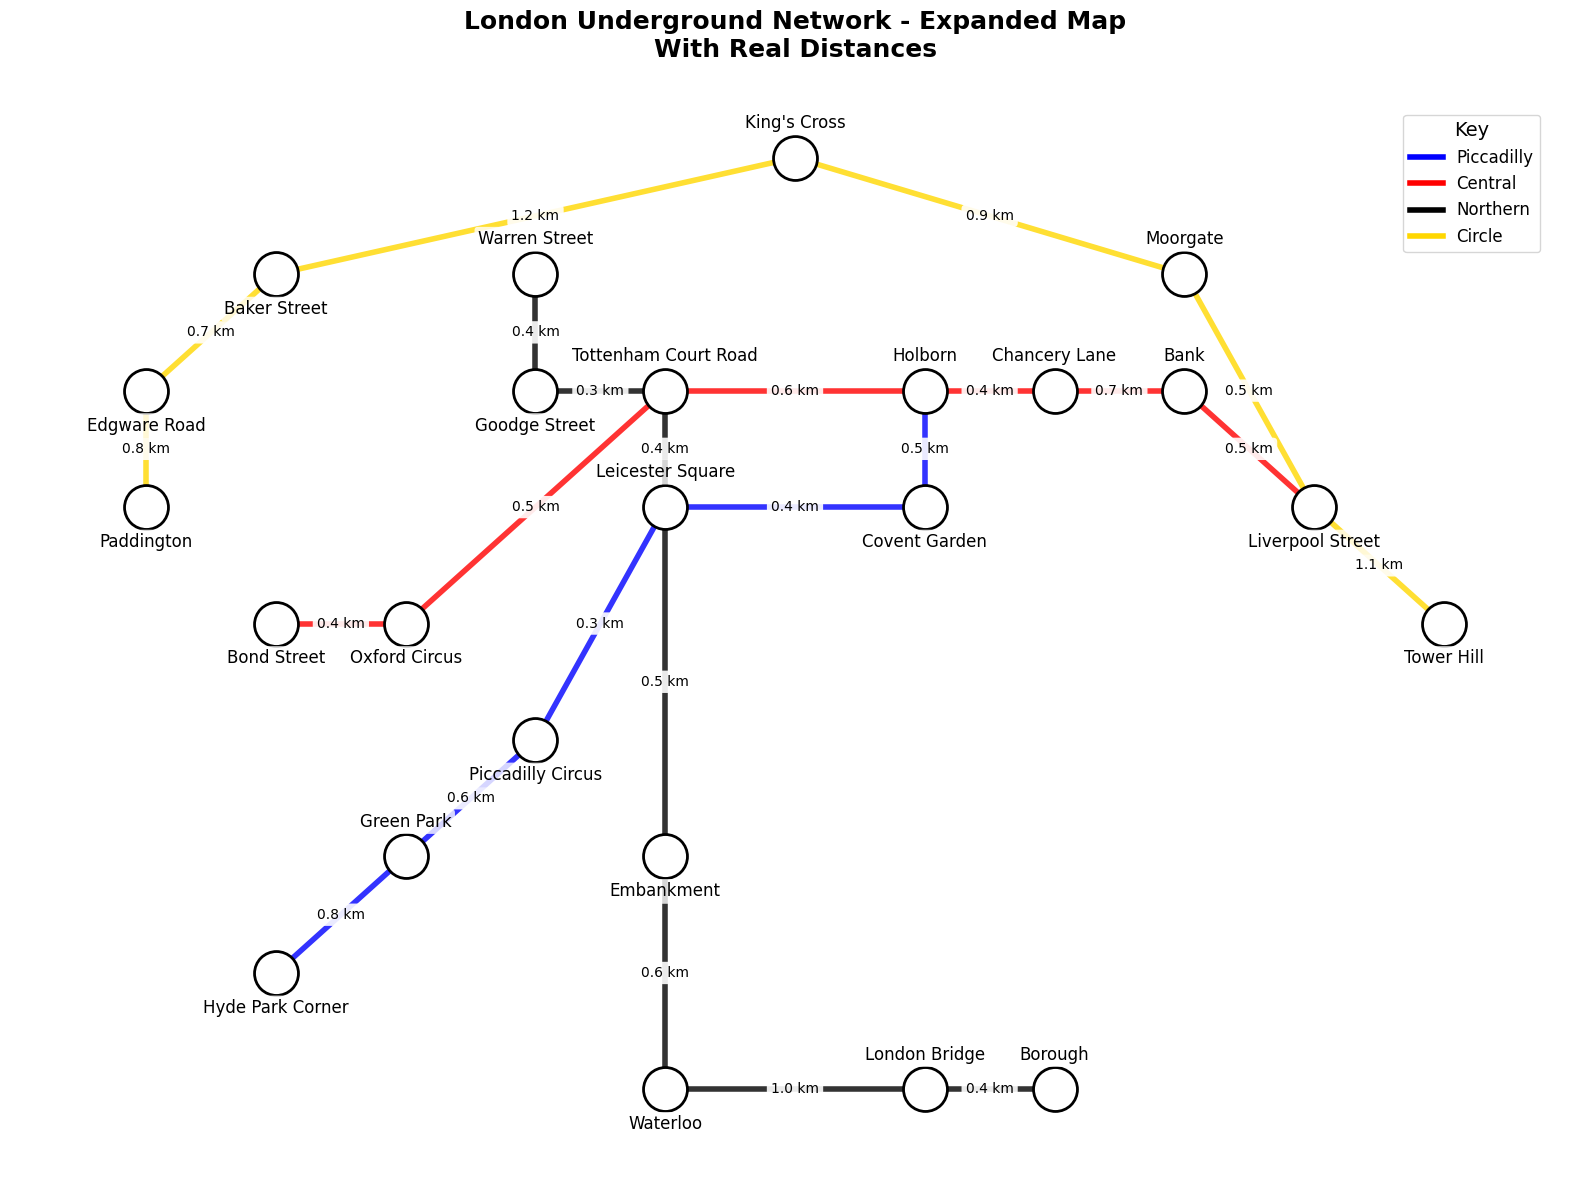

In [25]:
# Function to calculate smart label positions to avoid path overlap
def calculate_label_positions(graph, node_positions, offset_distance=0.3):
    label_positions = {}
    
    for node in graph.nodes():
        x, y = node_positions[node]
        
        # Get all connected nodes to determine path directions
        neighbors = list(graph.neighbors(node))
        
        if not neighbors:
            # Isolated node, place label below
            label_positions[node] = (x, y - offset_distance)
            continue
            
        # Calculate average direction of all edges from this node
        total_dx, total_dy = 0, 0
        for neighbor in neighbors:
            nx, ny = node_positions[neighbor]
            total_dx += nx - x
            total_dy += ny - y
        
        # Normalize the direction
        avg_dx = total_dx / len(neighbors)
        avg_dy = total_dy / len(neighbors)
        
        # Determine label offset based on path direction
        # If path goes up or up-right, place label below
        # If path goes down or down-left, place label above
        # If path is mostly horizontal, place label above or below based on slight vertical component
        
        if avg_dy > 0.1:  # Path goes upward
            # Place label below the node
            label_x = x
            label_y = y - offset_distance
        elif avg_dy < -0.1:  # Path goes downward
            # Place label above the node
            label_x = x
            label_y = y + offset_distance
        else:  # Mostly horizontal path
            if avg_dx > 0:  # Path goes right
                # Place label below to avoid overlap
                label_x = x
                label_y = y - offset_distance
            else:  # Path goes left
                # Place label above
                label_x = x
                label_y = y + offset_distance
        
        label_positions[node] = (label_x, label_y)
    
    return label_positions

# Create the visualization
plt.figure(figsize=(16, 12))

# Draw edges by line color
for line, color in line_colors.items():
    line_edges = [(u, v) for u, v, d in G.edges(data=True) if d['line'] == line]
    nx.draw_networkx_edges(G, pos, edgelist=line_edges, edge_color=color, width=4, alpha=0.8)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='white', node_size=1000, edgecolors='black', linewidths=2)

# Calculate smart label positions
label_pos = calculate_label_positions(G, pos)

# Draw node labels
for node, (x, y) in label_pos.items():
    plt.text(x, y, node, fontsize=12, 
             ha='center', va='center', 
             bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8, edgecolor='none'))

# Add distance labels on edges - Modified approach with smart offset
for (u, v, d) in G.edges(data=True):
    x1, y1 = pos[u]
    x2, y2 = pos[v]
    
    # Calculate midpoint
    x = (x1 + x2) / 2
    y = (y1 + y2) / 2
    
    # Calculate angle of the edge
    dx = x2 - x1
    dy = y2 - y1
    angle = np.arctan2(dy, dx)
    
    # Add perpendicular offset to avoid overlapping
    offset = 0.2  # Adjust this value to control label spacing
    if d['line'] == 'Northern' and u == 'Tottenham Court Road' and v == 'Leicester Square':
        # Special handling for the problematic edge
        x += offset * np.cos(angle + np.pi/2)
        y += offset * np.sin(angle + np.pi/2)
    
    plt.text(x, y, f"{d['weight']} km",
             fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9, edgecolor='none'),
             ha='center', va='center')

# Add title
plt.title('London Underground Network - Expanded Map\nWith Real Distances', fontsize=18, fontweight='bold', pad=20)

# Create legend
from matplotlib.lines import Line2D
legend_elements = []
for line, color in line_colors.items():
    legend_elements.append(Line2D([0], [0], color=color, lw=4, label=line))

plt.legend(handles=legend_elements, title='Key', loc='upper right', bbox_to_anchor=(0.98, 0.98), fontsize=12, title_fontsize=14)

plt.axis('off')
plt.tight_layout()
plt.show()

In [26]:
# Display network statistics
print("Expanded London Underground Network Information:")
print(f"Total number of stations: {G.number_of_nodes()}")
print(f"Total number of connections: {G.number_of_edges()}")
print(f"Network is connected: {nx.is_connected(G)}")
print("\nStations per line:")

# Count stations per line
line_stations = {line: set() for line in line_colors.keys()}
for u, v, d in G.edges(data=True):
    line_stations[d['line']].add(u)
    line_stations[d['line']].add(v)

for line, stations in line_stations.items():
    print(f"{line}: {len(stations)} stations")

print("\nInterchange stations (connected to multiple lines):")
interchange_stations = []
for station in G.nodes():
    connected_lines = set()
    for neighbor in G.neighbors(station):
        edge_data = G[station][neighbor]
        connected_lines.add(edge_data['line'])
    if len(connected_lines) > 1:
        interchange_stations.append((station, list(connected_lines)))

for station, lines in interchange_stations:
    print(f"{station}: {', '.join(lines)}")

Expanded London Underground Network Information:
Total number of stations: 24
Total number of connections: 24
Network is connected: True

Stations per line:
Piccadilly: 6 stations
Central: 7 stations
Northern: 8 stations
Circle: 7 stations

Interchange stations (connected to multiple lines):
Leicester Square: Piccadilly, Northern
Holborn: Piccadilly, Central
Tottenham Court Road: Northern, Central
Liverpool Street: Circle, Central
